In [7]:
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Read the uploaded file
# Ensure that the file name matches exactly with the uploaded file
df = pd.read_csv('lending_data (1).csv')

# Step 3: Verify the DataFrame
print(df.shape)


Saving lending_data (1).csv to lending_data (1) (3).csv
(77536, 8)


In [8]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [9]:
# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


In [10]:
print(df.describe())

          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt   loan_status  
count     77536.000000      77536.000000  77536.000000  77536.000000  
mean          3.826610          0.392308  19221.949804      0.032243  
std           1.904426          0.582086   8371.635077      0.176646  
min           0.000000          0.000000      0.000000      0.000000  
25%  

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


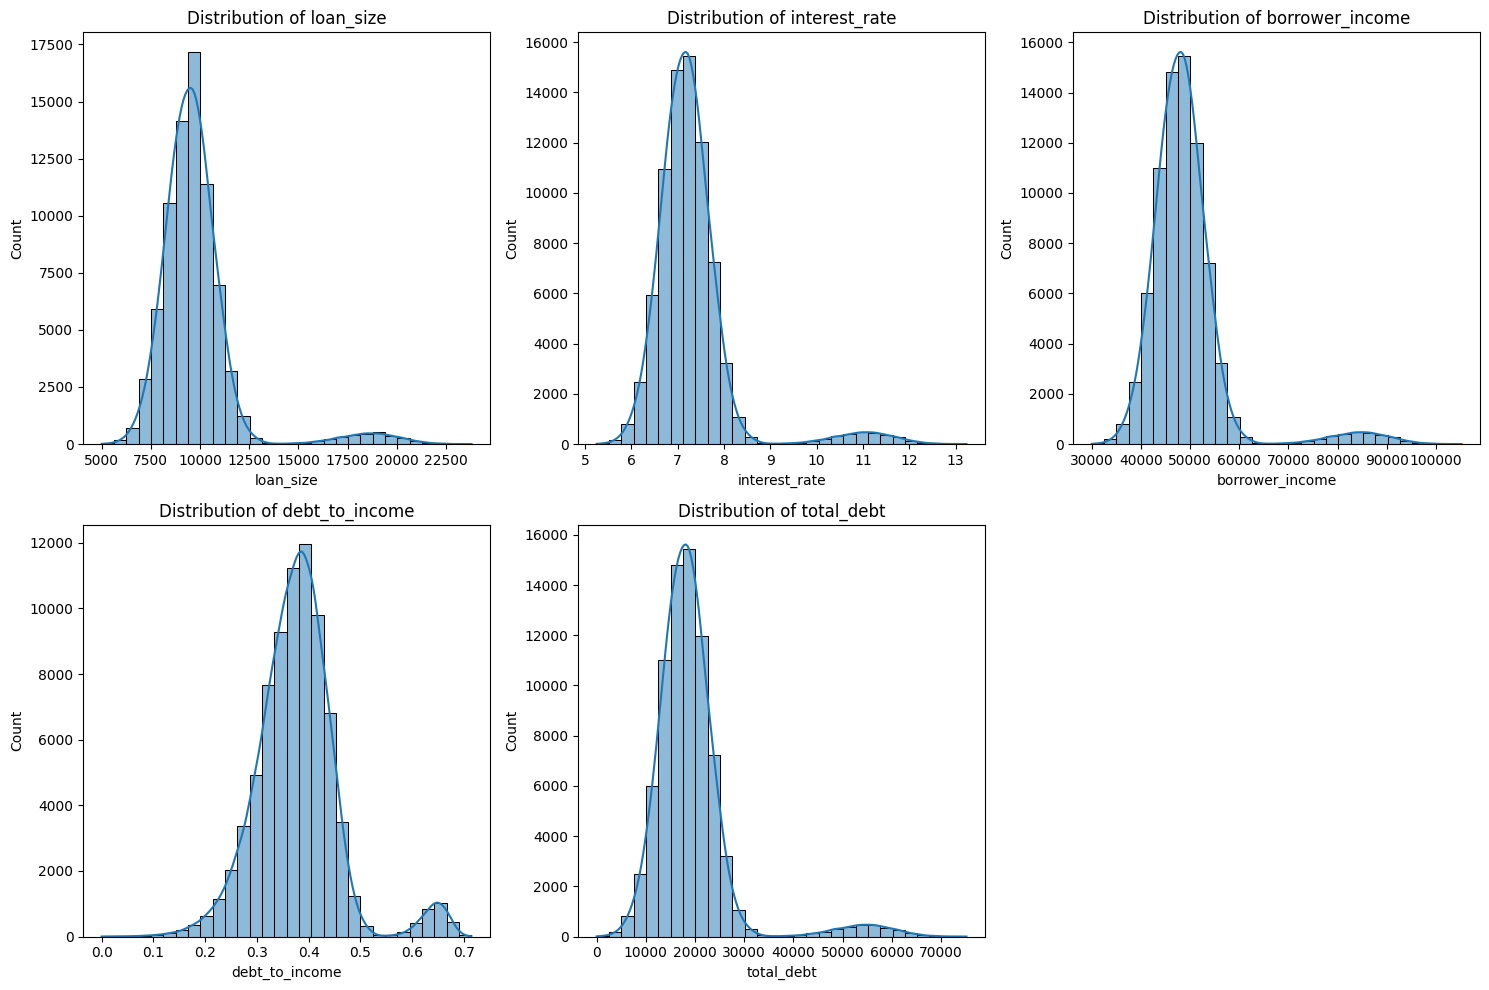

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ['loan_size', 'interest_rate', 'borrower_income',
                       'debt_to_income', 'total_debt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

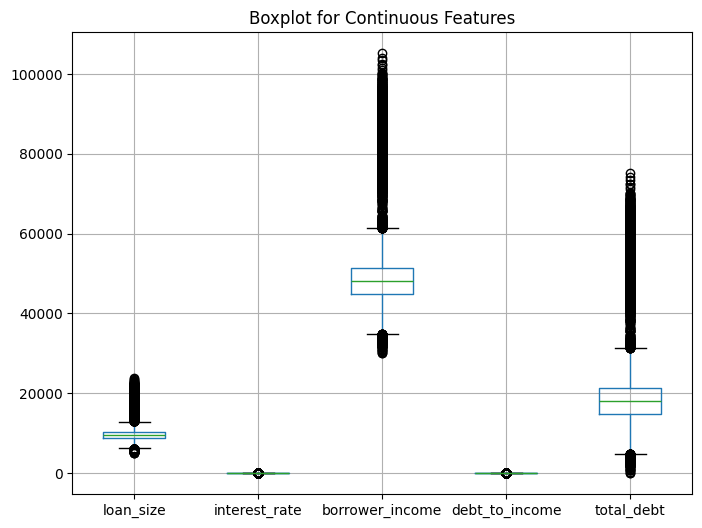

In [13]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(8, 6))
df[continuous_features].boxplot()
plt.title("Boxplot for Continuous Features")
plt.show()

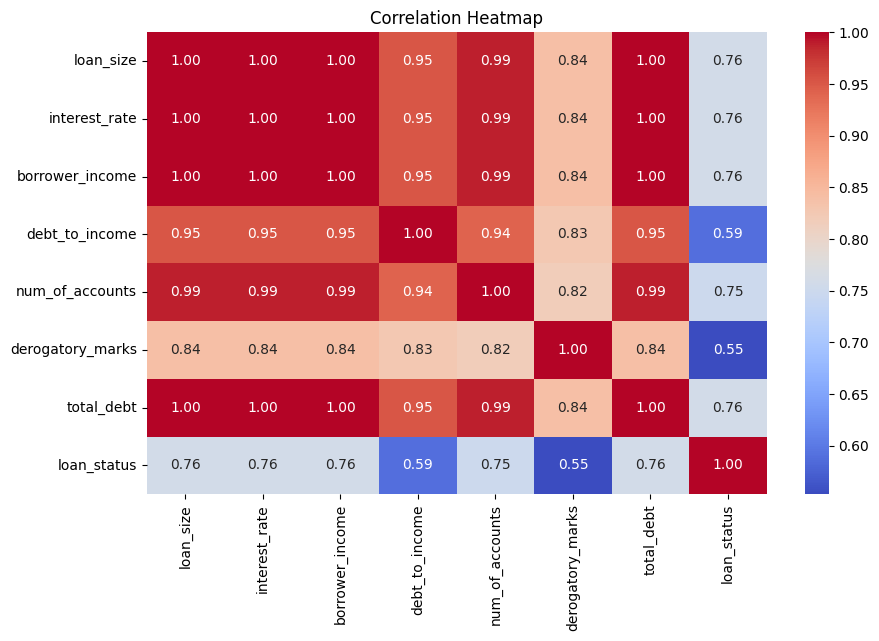

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
from scipy.stats import zscore
from ctypes import DEFAULT_MODE


# Step 2: Handle Outliers Using Z-Score
# Calculate Z-scores for continuous features
z_scores = df[continuous_features].apply(zscore)

# Set threshold for Z-scores (e.g., |Z| > 3)
threshold = 3

# Filter rows where all Z-scores are within the threshold
data_cleaned = df[(z_scores < threshold).all(axis=1)]

# Display the number of rows removed
rows_removed = len(df) - len(data_cleaned)
print(f"Rows removed: {rows_removed}")
print(f"Remaining rows: {len(data_cleaned)}")

Rows removed: 2737
Remaining rows: 74799


In [16]:
from sklearn.preprocessing import StandardScaler

# Step 3: Normalize Features
# Separate features and target
X = data_cleaned.drop('loan_status', axis=1)  # Features
y = data_cleaned['loan_status']              # Target

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])


In [17]:
# Step 4: Split the Dataset into Training and Testing Sets
# 80-20 split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (59839, 7), (59839,)
Testing set: (14960, 7), (14960,)


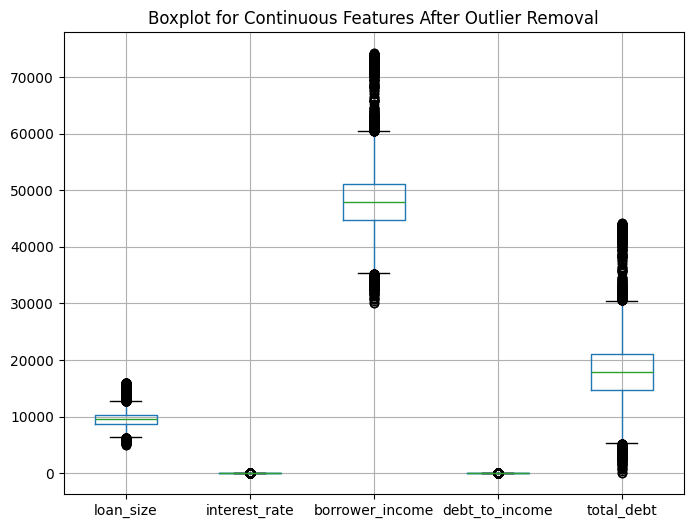

In [18]:
# Boxplots to visualize potential outliers
plt.figure(figsize=(8, 6))
data_cleaned[continuous_features].boxplot()
plt.title("Boxplot for Continuous Features After Outlier Removal")
plt.show()


In [19]:
class_counts= data_cleaned['loan_status'].value_counts()
class_counts

,count
loan_status,
0,74641
1,158


Frequency Table for Class distribution
loan_status
1      158
0    74641
Name: count, dtype: int64


<Axes: xlabel='loan_status'>

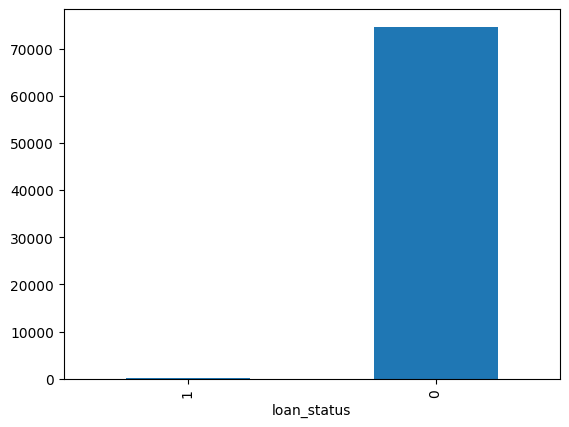

In [20]:
classDist = data_cleaned['loan_status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')

In [21]:
X=data_cleaned.drop(['loan_status'],axis=1)
y=data_cleaned['loan_status']
y.value_counts()

,count
loan_status,
0,74641
1,158


<Axes: ylabel='count'>

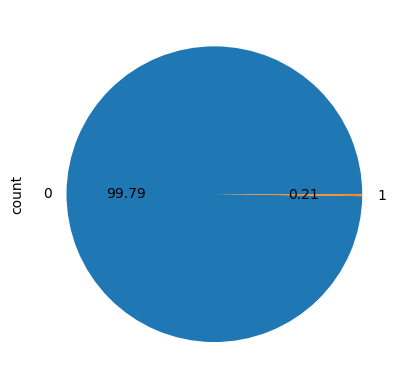

In [22]:
y.value_counts().plot.pie(autopct='%.2f')

# Data Balancing
Using SMOTE technic

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_balanced).value_counts())

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


Class distribution after SMOTE:
loan_status
0    74641
1    74641
Name: count, dtype: int64


In [24]:
y_balanced.value_counts()

,count
loan_status,
0,74641
1,74641


# Modelling for the Balanced Dataset

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Intializing the Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
# Make predictions
y_pred= log_reg.predict(X_test)

In [27]:
print(f"Training Score: {log_reg.score(X_train, y_train)}")
print(f"Testing Score: {log_reg.score(X_test, y_test)}")

Training Score: 0.9627297467029516
Testing Score: 0.9617175201795224


In [28]:
# Feature Importance
print("Feature Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef}")

Feature Coefficients:
loan_size: 0.004723041167891454
interest_rate: 0.001471813794028645
borrower_income: -0.0013717530052483585
debt_to_income: -0.38929525790195835
num_of_accounts: -3.5376552698255086
derogatory_marks: -5.519266730398372
total_debt: 0.0017419540693886756


In [29]:
#Model evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log_reg:.2f}")

Accuracy: 0.96


In [30]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14675   254]
 [  889 14039]]


In [31]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14929
           1       0.98      0.94      0.96     14928

    accuracy                           0.96     29857
   macro avg       0.96      0.96      0.96     29857
weighted avg       0.96      0.96      0.96     29857



# Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")
print("-" * 50)


Naive Bayes Classifier Results:
Accuracy: 0.9531
Confusion Matrix:
[[14571   358]
 [ 1041 13887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14929
           1       0.97      0.93      0.95     14928

    accuracy                           0.95     29857
   macro avg       0.95      0.95      0.95     29857
weighted avg       0.95      0.95      0.95     29857

--------------------------------------------------


# K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#Initialize the KNN
knn_model = KNeighborsClassifier(n_neighbors=100)

#Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [34]:
y_true=y_test
y_pred=knn_model.predict(X_test)

In [35]:
print(f"Training Score: {knn_model.score(X_train, y_train)}")
print(f"Testing Score: {knn_model.score(X_test, y_test)}")

Training Score: 0.9787481683064685
Testing Score: 0.9792678433868105


In [36]:
#Evaluate the model's Performance
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.98


In [37]:
#Print Classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14929
           1       1.00      0.96      0.98     14928

    accuracy                           0.98     29857
   macro avg       0.98      0.98      0.98     29857
weighted avg       0.98      0.98      0.98     29857



# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [39]:
print(f"Training Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Score: {rf_model.score(X_test, y_test)}")

Training Score: 0.9999078919824157
Testing Score: 0.9992631543691597


In [40]:
#Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

#Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

#sort the DataFrame by importance in descending Order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

#Display the feature importances
print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
            Feature  Importance
0         loan_size    0.351904
1     interest_rate    0.186229
2   borrower_income    0.158893
6        total_debt    0.139999
3    debt_to_income    0.127342
4   num_of_accounts    0.033559
5  derogatory_marks    0.002074


In [41]:
y_true=y_test
y_pred=rf_model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14929
           1       1.00      1.00      1.00     14928

    accuracy                           1.00     29857
   macro avg       1.00      1.00      1.00     29857
weighted avg       1.00      1.00      1.00     29857



# Comparision of Accuracy results

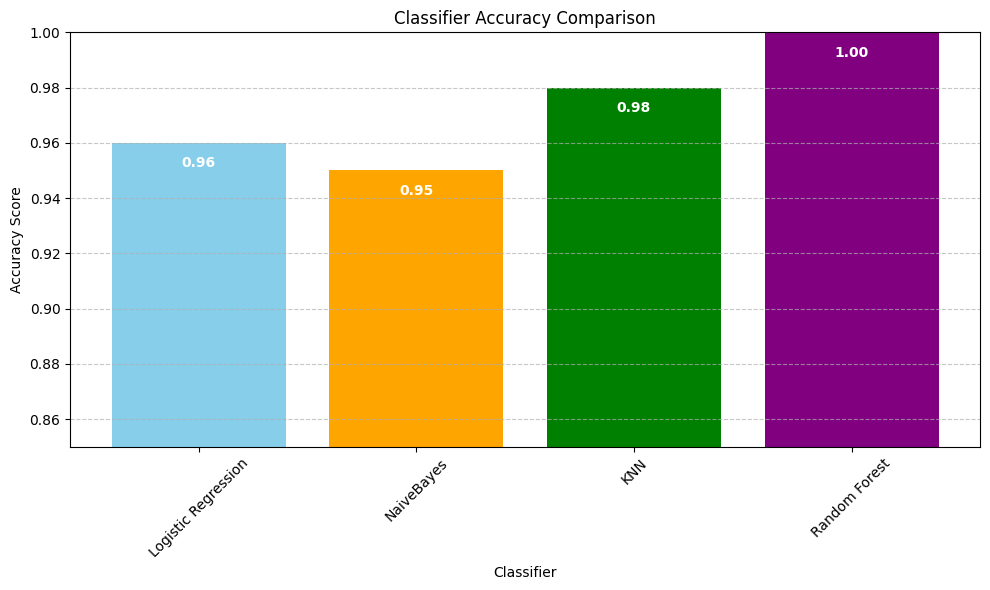

In [42]:
import matplotlib.pyplot as plt

# Values of accuracy results
accuracy_scores = {
    'Logistic Regression': 0.96,
    'NaiveBayes': 0.95,
    'KNN': 0.98,
    'Random Forest': 1.00
}

# Extract classifier names and their accuracies
classifiers = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Create a bar chart for accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['skyblue', 'orange', 'green', 'purple'])

# Add titles and labels
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0.85, 1)  # Adjust y-axis to focus on the range of accuracies
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 0.01, f"{acc:.2f}", ha='center', va='bottom', color='white', fontweight='bold')

plt.tight_layout()
plt.show()
